# <span style="color:royalblue"> [3주차] API 쉽게 배우기</span> <img src="./data/logo.png" style="width: 120px;" align="right">
# 2022 공공데이터 포털 API를 활용한 데이터 습득 및 분석

--- 

<div style="text-align: right"> Final Edition : 2022.11.1<br>
    copyrightⓒ 2022 All rights reserved by Data Lover Pablo </div>

### [Remind] API(Application Programming Interface)란? <br>
어플리케이션 소프트웨어를 구축하고 통합하기 위한 정의 및 프로토콜 세트. <span style="color:red">당사자 간의 규약</span><br>
한쪽 당사자가 특정방식으로 <span style="color:red">원격요청(Request)</span>을 보내면  → 다른 당사자가 <span style="color:red">지정된 양식으로 응답(Response)</span>하는 행위<br>

# 1. 공공 데이터 포털 Open API

## 1.1 공공 데이터 포털 API 서비스 신청 :  [공공 데이터 포털](https://www.data.go.kr/) 

* 접속경로 : 국가중점데이터별>부동산거래관리정보>공공데이터보기(파랑버튼)>오픈(API)  
* 접속링크 : [부동산 실거래가 API 목록 페이지](https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=API&keyword=&detailKeyword=&publicDataPk=15056649%2C15056782%2C15057267%2C15057511%2C15058016%2C15058017%2C15058022%2C15058038%2C15058352%2C15058452%2C15058747%2C15059249%2C3050988&recmSe=&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=true&coreDataNm=%EB%B6%80%EB%8F%99%EC%82%B0%EA%B1%B0%EB%9E%98%EA%B4%80%EB%A6%AC%EC%A0%95%EB%B3%B4&sort=&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode=)
* 오픈API : 12개(모두 신청, 신청수에 제한이 없음. 연구나 개인공부로 간단히 입력)

![이름](./data/공공데이터포털.jpg)

## 1.2 API KEY 인증키 획득

* 서비스를 신청하면 API KEY는 즉시 부여
* 신청후 해당 서비스를 이용할 수 있는데 까지는 1~2 시간이 걸립니다.
* API KEY는 개인별로 할당된 접속허가 ID/PW의 개념이므로 보안에 유의하시기 바랍니다.

### <span style="color:red"> STUDENT CODE 삭제후 배포(각자의 API KEY를 입력하세요)  </span>

In [2]:
# 각자의 인증키를 입력하세요
serviceKey = "TGx2sneqTsXdjko10wdGie36kuvH3plYf%2FBFMzEHV1e0P3sxlZw4TOQQ87rvbuSJgyx5qyr5uXTlNpDkY2mF3Q%3D%3D"

## 1.3 데이터 가져오기

서비스 명세서를 간단히 읽어보세요 [국토교통부 실거래가 정보 오픈API 활용 가이드]

http :openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/<span style="color:skyblue">getRTMSDataSvcAptTrade?</span>LAWD_CD=<span style="color:blue">28185</span>&DEAL_YMD=<span style="color:red">20211</span>&serviceKey=<span style="color:lime">인증키번호</span>&
* url의 구성 살펴보기 : API url / 서비스 코드 / 법정구 코드 / 거래년월 / 서비스 키
* <span style="color:skyblue">서비스 코드</span> : getRTMSDataSvcAptTrade? : 국토부 아파트 매매 실거래가 자료
* <span style="color:blue">법정구 코드</span> : "LAWD_CD=" + 법정구코드 + "&"
* <span style="color:red">거래년월</span> : "DEAL_YMD=" + 거래년월 + "&"
* <span style="color:lime">서비스 키</span> : "serviceKey=" + 각자의 API KEY + "&" 

[파이썬 request 사용법 블로그](https://www.daleseo.com/python-requests/)

### 1.3.1 XML(엑스엠엘 ; eXtensible Markup Language)
XML은 W3C에서 개발된, 다른 특수한 목적을 갖는 마크업 언어를 만드는데 사용하도록 권장하는 다목적 마크업 언어

In [3]:
# !pip install requests
import requests
import datetime

url ="http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?"

base_date = "202209" ## 거래년월
gu_code = '28185' ## 법정구코드 5자리 (구분. 법정동코드 5자리)

payload = "LAWD_CD=" + gu_code + "&" + \
          "DEAL_YMD=" + base_date + "&" + \
          "serviceKey=" + serviceKey + "&" 
          
res = requests.get(url + payload)
print(res)

<Response [200]>


In [4]:
url + payload

'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD=28185&DEAL_YMD=202209&serviceKey=TGx2sneqTsXdjko10wdGie36kuvH3plYf%2FBFMzEHV1e0P3sxlZw4TOQQ87rvbuSJgyx5qyr5uXTlNpDkY2mF3Q%3D%3D&'

## 1.4 국토부 실거래가 데이터(xml)를 가져오는 함수정의

In [5]:
# 각 객체에 바인딩 된 값을 출력해보겠습니다.
res.content

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><\xea\xb1\xb0\xeb\x9e\x98\xea\xb8\x88\xec\x95\xa1>      17,500</\xea\xb1\xb0\xeb\x9e\x98\xea\xb8\x88\xec\x95\xa1><\xea\xb1\xb0\xeb\x9e\x98\xec\x9c\xa0\xed\x98\x95>\xec\xa4\x91\xea\xb0\x9c\xea\xb1\xb0\xeb\x9e\x98</\xea\xb1\xb0\xeb\x9e\x98\xec\x9c\xa0\xed\x98\x95><\xea\xb1\xb4\xec\xb6\x95\xeb\x85\x84\xeb\x8f\x84>1997</\xea\xb1\xb4\xec\xb6\x95\xeb\x85\x84\xeb\x8f\x84><\xeb\x85\x84>2022</\xeb\x85\x84><\xeb\xb2\x95\xec\xa0\x95\xeb\x8f\x99> \xec\x98\xa5\xeb\xa0\xa8\xeb\x8f\x99</\xeb\xb2\x95\xec\xa0\x95\xeb\x8f\x99><\xec\x95\x84\xed\x8c\x8c\xed\x8a\xb8>\xec\x95\x84\xec\xa3\xbc1</\xec\x95\x84\xed\x8c\x8c\xed\x8a\xb8><\xec\x9b\x94>9</\xec\x9b\x94><\xec\x9d\xbc>12</\xec\x9d\xbc><\xec\xa0\x84\xec\x9a\xa9\xeb\xa9\xb4\xec\xa0\x81>29.7</\xec\xa0\x84\xec\x9a\xa9\xeb\xa9\xb4\xec\xa0\x81><\xec\xa4\x91\xea\xb0\x9c\xec\x82\xac\xec\x86\x8c\

### DOM(Document Object Model) 문서 객체 모델
XML 문서를 액세스하고 수정하기 위한 W3C(World Wide Web Consortium)의 교차 언어 API  
XML 데이터의 표준 트리 표현  
[DOM 파이썬 공식 문서](https://docs.python.org/ko/3/library/xml.dom.html)
[블로그](https://www.oulub.com/ko-KR/Python/library.xml.dom.minidom)

In [6]:
# 좀더 예쁘게(pretty) 볼까요?

import xml.dom.minidom
dom = xml.dom.minidom.parseString(res.content)

pretty_xml_as_string = dom.toprettyxml()
pretty_xml_as_string

'<?xml version="1.0" ?>\n<response>\n\t<header>\n\t\t<resultCode>00</resultCode>\n\t\t<resultMsg>NORMAL SERVICE.</resultMsg>\n\t</header>\n\t<body>\n\t\t<items>\n\t\t\t<item>\n\t\t\t\t<거래금액>      17,500</거래금액>\n\t\t\t\t<거래유형>중개거래</거래유형>\n\t\t\t\t<건축년도>1997</건축년도>\n\t\t\t\t<년>2022</년>\n\t\t\t\t<법정동> 옥련동</법정동>\n\t\t\t\t<아파트>아주1</아파트>\n\t\t\t\t<월>9</월>\n\t\t\t\t<일>12</일>\n\t\t\t\t<전용면적>29.7</전용면적>\n\t\t\t\t<중개사소재지>인천 연수구</중개사소재지>\n\t\t\t\t<지번>640-1</지번>\n\t\t\t\t<지역코드>28185</지역코드>\n\t\t\t\t<층>4</층>\n\t\t\t\t<해제사유발생일> </해제사유발생일>\n\t\t\t\t<해제여부> </해제여부>\n\t\t\t</item>\n\t\t\t<item>\n\t\t\t\t<거래금액>      40,500</거래금액>\n\t\t\t\t<거래유형>중개거래</거래유형>\n\t\t\t\t<건축년도>1997</건축년도>\n\t\t\t\t<년>2022</년>\n\t\t\t\t<법정동> 옥련동</법정동>\n\t\t\t\t<아파트>현대4</아파트>\n\t\t\t\t<월>9</월>\n\t\t\t\t<일>16</일>\n\t\t\t\t<전용면적>84.6</전용면적>\n\t\t\t\t<중개사소재지>인천 연수구</중개사소재지>\n\t\t\t\t<지번>637-1</지번>\n\t\t\t\t<지역코드>28185</지역코드>\n\t\t\t\t<층>7</층>\n\t\t\t\t<해제사유발생일> </해제사유발생일>\n\t\t\t\t<해제여부> </해제여부>\n\t\t\t</item>\n\t\t\t<item>\n\t\t\t

In [7]:
import xml.etree.ElementTree as ET
import pandas as pd

# 응답(reponse)을 인자로 받으면 item list를 반환하는 함수 정의
def get_items(response):
    root = ET.fromstring(response.content)
    item_list = []
    
    for child in root.find('body').find('items'):
        elements = child.findall('*')
        data = {}
        
        for element in elements:
            tag = element.tag.strip() # 문자열 앞뒤의 공백 제거 #지역코드 #법정동
            text = element.text.strip() #28185 #옥련동
            
            # print tag, text
            data[tag] = text
        item_list.append(data)
        
    return item_list

# 위에서 정의한 함수에 우리가 request를 통해 얻은(get) 응답(res)를 넣어줍니다.
items_list = get_items(res)

# 데이터 프레임 형태로 변환합니다.
items = pd.DataFrame(items_list)
items.head()

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"17,500",중개거래,1997,2022,옥련동,아주1,9,12,29.7,인천 연수구,640-1,28185,4,,
1,"40,500",중개거래,1997,2022,옥련동,현대4,9,16,84.6,인천 연수구,637-1,28185,7,,
2,"26,200",중개거래,1994,2022,연수동,문남마을,9,3,49.24,인천 연수구,540,28185,2,,
3,"29,500",중개거래,1992,2022,연수동,인향,9,19,84.975,인천 연수구,535-2,28185,5,,
4,"42,500",중개거래,1995,2022,동춘동,무지개마을,9,2,84.965,인천 연수구,931,28185,10,,


## 1.5 json(제이슨, JavaScript Object Notation)<br>
JSON은 속성-값 쌍 또는 "키-값 쌍"으로 이루어진 데이터 오브젝트를 전달하기 위해 인간이 읽을 수 있는 텍스트를 사용하는 개방형 표준 포맷.<br>       비동기 브라우저/서버 통신 을 위해, 넓게는 XML을 대체하는 주요 데이터 포맷

In [7]:
# !pip install requests xmltodict pandas

In [8]:
# 필요한 모듈을 import 합니다.
import json            # Python에서 JSON을 사용하기 위한 모듈
import requests        # HTTP Requests를 위한 모듈
import xmltodict       # XML 형식을 JSON으로 변환하기 위한 모듈
import pandas as pd    # DataFrame을 생성하고 가공하기 위한 모듈

In [10]:
url ="http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?"

# serviceKey = '각자 API KEY' 를 위에서 설정하였습니다.
base_date = "202001" ## 필요한 데이터의 년도와 월
gu_code = '11215' ## 법정동 코드 5자리라면, 구 단위로 데이터를 확보하는 것. 11215 = 광진구

payload = "LAWD_CD=" + gu_code + "&" + \
          "DEAL_YMD=" + base_date + "&" + \
          "serviceKey=" + serviceKey + "&" 

res = requests.get(url + payload)
print(res)

<Response [200]>


In [10]:
# 응답 결과의 내용을 Python Dict 형태로 변환합니다.

# 1. 문자열 XML을 Ordered Dictionary 문자열로 변환합니다. 
res_json = xmltodict.parse(res.text) 

# 2. JSON 형식으로 변환합니다.
res_dict = json.dumps(res_json)

# 3. key value 형태의 JSON 문자열을 파이썬의 Dictionary 형식으로 변환합니다.
data = json.loads(res_dict)          

# 위의 1~3 과정이 1줄로 작성된 변환 과정
data = json.loads(json.dumps(xmltodict.parse(res.text))) 

In [11]:
# 하나씩 뜯어보겠습니다.

In [12]:
# Ordered Dictionary 문자열
res_json

OrderedDict([('response',
              OrderedDict([('header',
                            OrderedDict([('resultCode', '00'),
                                         ('resultMsg', 'NORMAL SERVICE.')])),
                           ('body',
                            OrderedDict([('items',
                                          OrderedDict([('item',
                                                        [OrderedDict([('거래금액',
                                                                       '42,500'),
                                                                      ('거래유형',
                                                                       None),
                                                                      ('건축년도',
                                                                       '2009'),
                                                                      ('년',
                                                                       '2020'),
           

In [13]:
# 2. JSON 형식 {}
res_dict

'{"response": {"header": {"resultCode": "00", "resultMsg": "NORMAL SERVICE."}, "body": {"items": {"item": [{"\\uac70\\ub798\\uae08\\uc561": "42,500", "\\uac70\\ub798\\uc720\\ud615": null, "\\uac74\\ucd95\\ub144\\ub3c4": "2009", "\\ub144": "2020", "\\ubc95\\uc815\\ub3d9": "\\uc911\\uace1\\ub3d9", "\\uc544\\ud30c\\ud2b8": "\\uc8fc\\uc131AURA", "\\uc6d4": "1", "\\uc77c": "3", "\\uc804\\uc6a9\\uba74\\uc801": "67.8", "\\uc911\\uac1c\\uc0ac\\uc18c\\uc7ac\\uc9c0": null, "\\uc9c0\\ubc88": "130-5", "\\uc9c0\\uc5ed\\ucf54\\ub4dc": "11215", "\\uce35": "5", "\\ud574\\uc81c\\uc0ac\\uc720\\ubc1c\\uc0dd\\uc77c": null, "\\ud574\\uc81c\\uc5ec\\ubd80": null}, {"\\uac70\\ub798\\uae08\\uc561": "53,800", "\\uac70\\ub798\\uc720\\ud615": null, "\\uac74\\ucd95\\ub144\\ub3c4": "2002", "\\ub144": "2020", "\\ubc95\\uc815\\ub3d9": "\\uc911\\uace1\\ub3d9", "\\uc544\\ud30c\\ud2b8": "\\ub300\\uc6012\\ub3d9", "\\uc6d4": "1", "\\uc77c": "6", "\\uc804\\uc6a9\\uba74\\uc801": "84.33", "\\uc911\\uac1c\\uc0ac\\uc18c\\uc7ac

**유니코드**
  - 유니코드(영어: Unicode)는 전 세계의 모든 문자를 컴퓨터에서 일관되게 표현하고 다룰 수 있도록 설계된 산업 표준
  - 예를 들어 위의 "\\uac74(건)\\ucd95(축)\\ub144(년)\\ub3c4(도)"는 "건축년도" 라는 문자를 인코딩한 방식
  - 다음 값은 "\\ub144"으로 "년"과 동일
  - 인코딩 포맷으로 UTF-8. UTF-16, CP949 등이 있음. UTF-8은 Universal Coded Character Set + Transformation Format – 8-bit 의 약자

**인코딩과 디코딩**
 - 인코딩 : 사용자가 입력한 문자나 기호들을 컴퓨터가 이용할 수 있는 신호로 만드는 것
 - 디코딩 : 인코딩의 반대개념. 바이트 형태의 코드를 사람이 이해할 수 있는 언어로 해석해주는 것

In [14]:
# 3. 파이썬의 Dictionary
data

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'},
  'body': {'items': {'item': [{'거래금액': '42,500',
      '거래유형': None,
      '건축년도': '2009',
      '년': '2020',
      '법정동': '중곡동',
      '아파트': '주성AURA',
      '월': '1',
      '일': '3',
      '전용면적': '67.8',
      '중개사소재지': None,
      '지번': '130-5',
      '지역코드': '11215',
      '층': '5',
      '해제사유발생일': None,
      '해제여부': None},
     {'거래금액': '53,800',
      '거래유형': None,
      '건축년도': '2002',
      '년': '2020',
      '법정동': '중곡동',
      '아파트': '대영2동',
      '월': '1',
      '일': '6',
      '전용면적': '84.33',
      '중개사소재지': None,
      '지번': '133-9',
      '지역코드': '11215',
      '층': '6',
      '해제사유발생일': None,
      '해제여부': None},
     {'거래금액': '50,500',
      '거래유형': None,
      '건축년도': '2002',
      '년': '2020',
      '법정동': '중곡동',
      '아파트': '대영2동',
      '월': '1',
      '일': '22',
      '전용면적': '84.91',
      '중개사소재지': None,
      '지번': '133-9',
      '지역코드': '11215',
      '층': '1',
      '해제사유발생일': N

## 1.6 국토부 실거래가 데이터(json)를 가져오는 함수정의

### 1.6.1 AptTrade	아파트매매 실거래자료 조회

In [11]:
def get_df(lawd_cd, deal_ymd):
    global serviceKey
#     print(serviceKey)
    base_url = "http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?serviceKey="+serviceKey
    base_url += f'&LAWD_CD={lawd_cd}'
    base_url += f'&DEAL_YMD={deal_ymd}'
    
    res = requests.get(base_url)
    data = json.loads(json.dumps(xmltodict.parse(res.text)))
    df = pd.DataFrame(data['response']['body']['items']['item'])
    
    return df

[문자열 포맷팅](https://velog.io/@suasue/Python-%EC%84%9C%EC%8B%9D-%EC%A7%80%EC%A0%95%EC%9E%90-%EB%AC%B8%EC%9E%90%EC%97%B4-%ED%8F%AC%EB%A7%A4%ED%8C%85)

language = 'Python'  
version = 3.6  
f'Hello, {language} {version}'  
  
'Hello, Python 3.6'

In [16]:
df = get_df(11680, 202209)

In [17]:
df

,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"20,080",중개거래,2012,2022,역삼동,대명벨리온,9,1,17.684,서울 강남구,727-2,11680,4,None,None
1,"33,000",중개거래,2002,2022,역삼동,대우디오빌,9,2,30.03,서울 강남구,720-25,11680,6,None,None
2,"19,500",중개거래,2014,2022,역삼동,이스턴오피스텔,9,15,14.78,서울 강남구,735-15,11680,12,None,None
3,"19,500",중개거래,2014,2022,역삼동,이스턴오피스텔,9,17,15.25,서울 강남구,735-15,11680,10,None,None
4,"190,000",중개거래,2010,2022,역삼동,래미안그레이튼(진달래2차),9,18,59.91,서울 강남구,762-3,11680,11,None,None
5,"18,300",중개거래,2014,2022,역삼동,이스턴오피스텔,9,20,14.78,서울 강남구,735-15,11680,12,None,None
6,"82,000",중개거래,2006,2022,역삼동,역삼I'PARK,9,24,28.246,서울 강남구,713-11,11680,4,None,None
7,"92,000",중개거래,1992,2022,개포동,성원대치2단지아파트,9,24,33.18,서울 강남구,12,11680,12,None,None
8,"365,000",중개거래,2011,2022,청담동,청담자이,9,8,89.115,서울 강남구,134-38,11680,15,None,None
9,"45,000",중개거래,1997,2022,삼성동,풍림,9,23,51.68,서울 강남구,129-20,11680,4,None,None


### 1.6.2 AptRent	아파트 전월세 자료 조회

In [17]:
# from urllib.parse import urlencode, quote_plus
from bs4 import BeautifulSoup 

url = "http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?"

# 원하는 거래년월을 입력합니다.
base_date = ["202107", "202108", "202109"]

# 거래년월 수만큼 반복합니다.
for i in range(len(base_date)):

    gu_code = '28185'  ##구 단위로 데이터를 확보 ex)11545 = 금천구, 28185 = 연수구
    payload = "serviceKey=" + serviceKey + "&" + "LAWD_CD=" + gu_code + "&" + "DEAL_YMD=" + base_date[i] + "&"

    res = requests.get(url + payload).text
    xml_obj = BeautifulSoup(res, 'lxml-xml') # 매우 빠름. 유일하게 지원되는 xml parser
    rows = xml_obj.findAll('item') # item 하나가 한 건의 부동산 거래건

    rowList = []
    nameList = []
    columnList = []

    # 행 숫자만큼 반복해줍니다. 행번호 i
    rowsLen = len(rows)
    for i in range(0, rowsLen): # 부동산 거래 건수만큼 반복
        
        # 행에 있는 아이템 수만큼 열을 생성해줍니다.
        columns = rows[i].find_all()
        
        # 열 숫자만큼 반복해줍니다. 열번호 j
        columnsLen = len(columns)              
        for j in range(0, columnsLen):
            
            # 첫번째[0] 줄은 칼럼명으로 설정해줍니다.
            if i == 0:
                nameList.append(columns[j].name)
            
            # 그 다음 줄부터는 문자열을 읽어와서 각 칼럼값에 추가해줍니다.
            eachColumn = columns[j].text
            columnList.append(eachColumn)
        
        # 칼럼값이 추가된 리스트를 한 줄의 행으로 추가해줍니다.
        rowList.append(columnList)
        columnList = []

# rowList에 쌓인 값을 데이터 프레임 형태로 변환합니다. 이때 칼럼명은 첫번째 열번호 j=0에서 만들어준 nameList를 가져옵니다.        
result = pd.DataFrame(rowList, columns=nameList)

In [18]:
result

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
0,,1996,,,2021,옥련동,"28,000",삼성,9,0,1,59.98,,,634-1,28185,5
1,,1997,,,2021,옥련동,"38,000",현대4,9,0,1,84.6,,,637-1,28185,14
2,,1998,,,2021,옥련동,"3,000",풍림,9,45,2,44.4,,,643-2,28185,5
3,,1994,,,2021,옥련동,"1,000",백산,9,60,3,59.76,,,630,28185,4
4,,1997,,,2021,옥련동,"30,000",백산2,9,0,3,147.749,,,638-1,28185,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,,2018,,,2021,송도동,"42,000",e편한세상송도,9,0,30,70.2331,,,319-1,28185,22
754,,2018,,,2021,송도동,"42,000",e편한세상송도,9,0,30,70.2331,,,319-1,28185,22
755,,2018,,,2021,송도동,"5,000",e편한세상송도,9,140,30,70.3826,,,319-1,28185,19
756,,2019,,,2021,송도동,"34,000",송도SKVIEW,9,0,30,84.6541,,,315-1,28185,12


In [19]:
# 2022년부터
# 갱신요구권 사용여부, 계약구분, 계약기간, 종전계약보증금, 종전계약월세 칼럼이 생성되었습니다.

## 1.7 법정동 코드

[행정표준코드 관리시스템 > 법정동코드 검색](https://www.code.go.kr/stdcode/regCodeL.do)

![행정표준](./data/행정표준코드관리시스템.jpg)

## 1.8 전용면적과 공급면적

![전용면적과공급면적](./data/전용면적.jpg)

# 2. 최신 Open Source Package 활용하기

 ## 2.1 PublicDataReader

In [20]:
# !pip install --upgrade PublicDataReader

In [18]:
# !pip install PublicDataReader
# !pip install --upgrade PublicDataReader
# import pandas as pd
import PublicDataReader as pdr

정우일님 블로그
https://wooiljeong.github.io/python/public_data_reader_01  
정우일님 깃허브
https://github.com/WooilJeong/PublicDataReader

In [19]:
# 1. 라이브러리 임포트하기
import PublicDataReader as pdr
print(pdr.__version__)
print(pdr.__info__)

2021.11.17
- Author : Wooil Jeong
- E-mail : wooil@kakao.com
- Github : https://github.com/WooilJeong/PublicDataReader
- Blog : https://wooiljeong.github.io


In [20]:
# 3. 국토교통부 실거래가 정보 조회 OpenAPI 세션 정의하기 (Open API 인스턴스 생성)
# debug: True이면 모든 메시지 출력, False이면 오류 메시지만 출력 (기본값: False)
ts = pdr.Transaction(serviceKey, debug=True)
ts

[INFO] 아파트 매매 조회 서비스 정상 - (00) NORMAL SERVICE.
[INFO] 아파트 전월세 조회 서비스 정상 - (00) NORMAL SERVICE.
[INFO] 오피스텔 매매 조회 서비스 정상 - (00) NORMAL SERVICE.
[INFO] 오피스텔 전월세 조회 서비스 정상 - (00) NORMAL SERVICE.
[INFO] 단독다가구 매매 조회 서비스 정상 - (00) NORMAL SERVICE.
[INFO] 단독다가구 전월세 조회 서비스 정상 - (00) NORMAL SERVICE.
[INFO] 연립다세대 매매 조회 서비스 정상 - (00) NORMAL SERVICE.
[INFO] 연립다세대 전월세 조회 서비스 정상 - (00) NORMAL SERVICE.
[INFO] 상업업무용 매매 조회 서비스 정상 - (00) NORMAL SERVICE.
[INFO] 토지 매매 조회 서비스 정상 - (00) NORMAL SERVICE.
[INFO] 분양입주권 매매 조회 서비스 정상 - (00) NORMAL SERVICE.


In [24]:
# 2022.7 동코드 조회 일시 오류

In [22]:
# code[code['읍면동명'] == '송도동']

In [24]:
# # str.contains 와 isin([]) 설명하기

# sigunguName = "귀포"  
# dongName = "표선면"
# # jeju = code.loc[(code['시군구명'].str.contains(sigunguName, na=False)) & code['읍면동명'].isin([dongName])]
# jeju = code.loc[(code['시군구명'].str.contains(sigunguName)) & code['읍면동명'].isin([dongName])]

# print(jeju.shape)
# jeju

In [27]:
'''
# 4. 지역코드(시군구코드) 검색하기
sigunguName = "연수구"                                  # 시군구코드: 41287
code = pdr.code_list()
code.loc[(code['시군구명'].str.contains(sigunguName, na=False)) &
         (code['읍면동명'].isna())]
'''

'\n# 4. 지역코드(시군구코드) 검색하기\nsigunguName = "연수구"                                  # 시군구코드: 41287\ncode = pdr.code_list()\ncode.loc[(code[\'시군구명\'].str.contains(sigunguName, na=False)) &\n         (code[\'읍면동명\'].isna())]\n'

In [25]:
# 5. 지역, 월 별 데이터 프레임 만들기
import warnings
warnings.filterwarnings(action='ignore')

prod="아파트"                                           # 부동산 상품 종류 (ex. 아파트, 오피스텔, 단독다가구 등)
trans="매매"                                            # 부동산 거래 유형 (ex. 매매, 전월세)
sigunguCode="41287" #경기 고양 일산 서구
yearMonth="202209"

df = ts.read_data(prod, trans, sigunguCode, yearMonth)
df

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부
0,41287,후곡로,일산동,1066,후곡마을(금호),1995,14,83.77,2022,9,...,1066,0000,41287,10100,1,41287-12,중개거래,경기 고양일산동구,,
1,41287,원일로21번길,일산동,1655,일신휴먼빌(1655),2003,11,84.988,2022,9,...,1655,0000,41287,10100,1,41287-140,중개거래,경기 고양일산서구,,
2,41287,고봉로329번길,일산동,1818,신영,1987,5,42.12,2022,9,...,1818,0000,41287,10100,1,41287-83,중개거래,경기 고양일산서구,,
3,41287,고양대로,일산동,973-31,일산동문(3),1997,4,84.96,2022,9,...,0973,0031,41287,10100,1,41287-6,중개거래,경기 고양일산동구,,
4,41287,일산로,일산동,1093,후곡마을(태영13),1994,12,57.76,2022,9,...,1093,0000,41287,10100,1,41287-129,중개거래,경기 고양일산서구,,
5,41287,킨텍스로,일산동,1040,후곡마을(벽산),1995,6,70.444,2022,9,...,1040,0000,41287,10100,1,41287-22,중개거래,경기 고양일산서구,,
6,41287,탄중로,일산동,2041,에이스10차,1996,8,59.73,2022,9,...,2041,0000,41287,10100,1,41287-84,중개거래,경기 고양일산서구,,
7,41287,원일로21번길,일산동,1655,일신휴먼빌(1655),2003,19,70.983,2022,9,...,1655,0000,41287,10100,1,41287-140,중개거래,경기 고양일산서구,,
8,41287,강선로,일산동,1087,후곡마을(태영17),1994,12,101.93,2022,9,...,1087,0000,41287,10100,1,41287-29,중개거래,경기 고양일산서구,,
9,41287,탄중로471번길,일산동,587-7,미주6차,1989,1,60.4,2022,9,...,0587,0007,41287,10100,1,41287-1,중개거래,경기 고양일산서구,,


In [44]:
# 6. 지역, 기간 별 데이터 프레임 만들기
prod="아파트"                                           # 부동산 상품 종류 (ex. 아파트, 오피스텔, 단독다가구 등)
trans="매매"                                            # 부동산 거래 유형 (ex. 매매, 전월세)
sigunguCode="41287"
startYearMonth="202101"
endYearMonth="202210"

df = ts.collect_data(prod, trans, sigunguCode, startYearMonth, endYearMonth)

[INFO] 아파트 매매 202101 조회 시작
[INFO] 아파트 매매 202102 조회 시작
[INFO] 아파트 매매 202103 조회 시작
[INFO] 아파트 매매 202104 조회 시작
[INFO] 아파트 매매 202105 조회 시작
[INFO] 아파트 매매 202106 조회 시작
[INFO] 아파트 매매 202107 조회 시작
[INFO] 아파트 매매 202108 조회 시작
[INFO] 아파트 매매 202109 조회 시작
[INFO] 아파트 매매 202110 조회 시작
[INFO] 아파트 매매 202111 조회 시작
[INFO] 아파트 매매 202112 조회 시작
[INFO] 아파트 매매 202201 조회 시작
[INFO] 아파트 매매 202202 조회 시작
[INFO] 아파트 매매 202203 조회 시작
[INFO] 아파트 매매 202204 조회 시작
[INFO] 아파트 매매 202205 조회 시작
[INFO] 아파트 매매 202206 조회 시작
[INFO] 아파트 매매 202207 조회 시작
[INFO] 아파트 매매 202208 조회 시작
[INFO] 아파트 매매 202209 조회 시작


### 국토교통부 실거래가 정보 조회 서비스

| **메서드**     | **서비스 명**                         |
| -------------- | ------------------------------------- |
| CondeFinder    | 지역코드 조회                         |
| DataCollector  | 서비스/기간 별 데이터 조회            |
| AptTrade       | 아파트매매 실거래자료 조회            |
| AptTradeDetail | 아파트매매 실거래 상세 자료 조회      |
| AptRent        | 아파트 전월세 자료 조회               |
| AptOwnership   | 아파트 분양권전매 신고 자료 조회      |
| OffiTrade      | 오피스텔 매매 신고 조회               |
| OffiRent       | 오피스텔 전월세 신고 조회             |
| RHTrade        | 연립다세대 매매 실거래자료 조회       |
| RHRent         | 연립다세대 전월세 실거래자료 조회     |
| DHTrade        | 단독/다가구 매매 실거래 조회          |
| DHRent         | 단독/다가구 전월세 자료 조회          |
| LandTrade      | 토지 매매 신고 조회                   |
| BizTrade       | 상업업무용 부동산 매매 신고 자료 조회 |


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714 entries, 0 to 5713
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역코드        5714 non-null   object
 1   도로명         5714 non-null   object
 2   법정동         5714 non-null   object
 3   지번          5714 non-null   object
 4   아파트         5714 non-null   object
 5   건축년도        5714 non-null   object
 6   층           5714 non-null   object
 7   전용면적        5714 non-null   object
 8   년           5714 non-null   object
 9   월           5714 non-null   object
 10  일           5714 non-null   object
 11  거래금액        5714 non-null   object
 12  도로명건물본번호코드  5714 non-null   object
 13  도로명건물부번호코드  5714 non-null   object
 14  도로명시군구코드    5714 non-null   object
 15  도로명일련번호코드   5714 non-null   object
 16  도로명지상지하코드   5714 non-null   object
 17  도로명코드       5714 non-null   object
 18  법정동본번코드     5714 non-null   object
 19  법정동부번코드     5714 non-null   object
 20  법정동시군구코드

In [46]:
df.tail()

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부
5709,41287,하이파크3로,덕이동,1540,하이파크시티일산아이파크5단지,2011,23,175.8458,2022,9,...,1540,0000,41287,10500,1,41287-296,직거래,,,
5710,41287,경의로,덕이동,277-10,철산,1989,3,43.29,2022,9,...,0277,0010,41287,10500,1,41287-164,중개거래,경기 고양일산서구,,
5711,41287,하이파크3로,덕이동,1535,하이파크시티일산파밀리에4단지,2011,17,101.93,2022,9,...,1535,0000,41287,10500,1,41287-300,중개거래,경기 고양일산서구,,
5712,41287,장자길118번길,덕이동,676-1,동문굿모닝힐3,2003,11,84.2747,2022,9,...,0676,0001,41287,10500,1,41287-139,중개거래,경기 고양일산서구,,
5713,41287,송포로,가좌동,1105,가좌마을7단지꿈에그린,2010,10,59.9911,2022,9,...,1105,0000,41287,10600,1,41287-292,중개거래,경기 고양일산서구,,


--- 

## 연도와 월을 추출하는 방법 3가지
- 월 및 연도를 추출하는 pandas.Series.dt.year() 및 pandas.Series.dt.month() 메소드<BR>
    df['Year'] = df['Joined date'].dt.year <BR><BR>
- 연도 및 월을 추출하는 strftime()메소드<BR>
    df['year'] = df['Joined date'].dt.strftime('%Y')<BR><BR>
- 연도 및 월을 추출하는pandas.DatetimeIndex.month 및pandas.DatetimeIndex.year<BR>
    df['year'] = pd.DatetimeIndex(df['Joined date']).year<BR><BR>

[참고 블로그](https://www.delftstack.com/ko/howto/python-pandas/how-to-extract-month-and-year-separately-from-datetime-column-in-pandas/)

In [47]:
# 년, 월, 일 3개 칼럼에 있는 값을 join해서 거래일 칼럼을 만듭니다.
cols = ['년','월','일']
df['거래일'] = df[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [48]:
df['거래일']

0        2021-1-1
1        2021-1-2
2        2021-1-2
3        2021-1-2
4        2021-1-2
          ...    
5709     2022-9-5
5710     2022-9-8
5711    2022-9-13
5712    2022-9-24
5713    2022-9-14
Name: 거래일, Length: 5714, dtype: object

In [49]:
# 거래일을 날짜타입으로 변경해줍니다.
df['거래일'] = pd.to_datetime(df['거래일'], format='%Y-%m-%d', errors='raise')

In [50]:
df

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,거래일
0,41287,탄중로,일산동,2019,에이스11차,1996,1,59.97,2021,1,...,0000,41287,10100,1,41287-251,,,,,2021-01-01
1,41287,탄중로471번길,일산동,587-2,일산중앙가든,1989,4,45.45,2021,1,...,0002,41287,10100,1,41287-9,,,21.01.27,O,2021-01-02
2,41287,고양대로,일산동,955-2,일산동양(955-2),2004,7,84.972,2021,1,...,0002,41287,10100,1,41287-158,,,,,2021-01-02
3,41287,탄중로,일산동,2041,에이스10차,1996,17,59.73,2021,1,...,0000,41287,10100,1,41287-84,,,,,2021-01-02
4,41287,산현로,일산동,1694,동문,1996,16,84.96,2021,1,...,0000,41287,10100,1,41287-79,,,,,2021-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5709,41287,하이파크3로,덕이동,1540,하이파크시티일산아이파크5단지,2011,23,175.8458,2022,9,...,0000,41287,10500,1,41287-296,직거래,,,,2022-09-05
5710,41287,경의로,덕이동,277-10,철산,1989,3,43.29,2022,9,...,0010,41287,10500,1,41287-164,중개거래,경기 고양일산서구,,,2022-09-08
5711,41287,하이파크3로,덕이동,1535,하이파크시티일산파밀리에4단지,2011,17,101.93,2022,9,...,0000,41287,10500,1,41287-300,중개거래,경기 고양일산서구,,,2022-09-13
5712,41287,장자길118번길,덕이동,676-1,동문굿모닝힐3,2003,11,84.2747,2022,9,...,0001,41287,10500,1,41287-139,중개거래,경기 고양일산서구,,,2022-09-24


In [51]:
# 거래일에 결측치(na) 값을 확인합니다
df['거래일'].isna().sum()

0

In [52]:
# 분석 타겟인 거래금액 값을 숫자형으로 바꿔줍니다.
df['거래금액'] = df['거래금액'].str.replace(',', '').astype('int64')

### 특정도, 특정 평형대에 대한 시계열 데이터 추출

In [53]:
# 플롯 설정
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rc('font', family = 'NanumGothic')  

plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

In [54]:
# runtime configuration은 번역하면, 동적 구성인데, 변수들에 대한 정보를 저장하는 용도로 쓰입니다. matplotlib에서 성질을 저장하는 rcParams 딕셔너리를 조작하면 Runtime(생성시) 그리는 정보를 바꿔줄 수 있습니다.

# 연습문제(Exercise) 1 - Just Do It Now !

전용면적을 기준으로 20평대, 30평대, 40평대로 데이터를 나누고, df['평형대'] 라는 칼럼을 생성해 봅니다

In [55]:
df['전용면적'] = pd.to_numeric(df['전용면적'])

df.loc[df['전용면적'] <= 66, '평형대'] = 10
df.loc[(df['전용면적'] > 66) & (df['전용면적'] <= 99), '평형대'] = 20
df.loc[(df['전용면적'] > 99) & (df['전용면적'] <= 132), '평형대'] = 30
df.loc[(df['전용면적'] > 132) & (df['전용면적'] <= 165), '평형대'] = 40
df.loc[df['전용면적'] > 165, '평형대'] = 50

In [56]:
x_30 = df.loc[df['평형대']==30]
x_40 = df.loc[df['평형대']==40]
x_50 = df.loc[df['평형대']==50]

x_30

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,거래일,평형대
57,41287,후곡로,일산동,1048,후곡마을(한진),1995,9,101.6400,2021,1,...,41287,10100,1,41287-31,,,21.04.14,O,2021-01-16,30.0
86,41287,일청로,일산동,1945-1,푸르지오,2013,16,111.9300,2021,1,...,41287,10100,1,41287-303,,,,,2021-01-24,30.0
92,41287,고양대로,일산동,651-1,일산2차현대홈타운,2002,12,110.2100,2021,1,...,41287,10100,1,41287-35,,,,,2021-01-25,30.0
99,41287,일중로15번길,일산동,2147,유진스웰2단지,2010,16,125.9286,2021,1,...,41287,10100,1,41287-294,,,,,2021-01-27,30.0
101,41287,강선로,일산동,1101,후곡마을(청구),1994,1,101.0000,2021,1,...,41287,10100,1,41287-27,,,,,2021-01-27,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5678,41287,하이파크3로,덕이동,1535,하이파크시티일산파밀리에4단지,2011,16,101.9300,2022,8,...,41287,10500,1,41287-300,중개거래,경기 고양일산서구,,,2022-08-22,30.0
5688,41287,강선로,일산동,1087,후곡마을(태영17),1994,12,101.9300,2022,9,...,41287,10100,1,41287-29,중개거래,경기 고양일산서구,,,2022-09-24,30.0
5698,41287,대산로,주엽동,36,강선마을(대우),1994,8,131.4600,2022,9,...,41287,10200,1,41287-40,중개거래,경기 고양일산서구,,,2022-09-16,30.0
5701,41287,탄현로,탄현동,1634,일산임광진흥아파트,2009,14,124.0600,2022,9,...,41287,10300,1,41287-291,중개거래,경기 고양일산서구,,,2022-09-02,30.0


In [57]:
# 특정 아파트명으로 데이터 추출
x_30_firstpark = x_30[x_30['아파트'].str.contains('가좌마을')]
x_30_firstpark.value_counts('거래금액')

거래금액
50000    3
53000    3
42000    2
46000    2
51000    2
59000    1
58500    1
57000    1
56700    1
56000    1
55000    1
54500    1
54400    1
53500    1
35700    1
39800    1
49200    1
49000    1
47500    1
45500    1
44800    1
44000    1
40700    1
40000    1
62500    1
dtype: int64

<AxesSubplot:xlabel='거래일', ylabel='거래금액'>

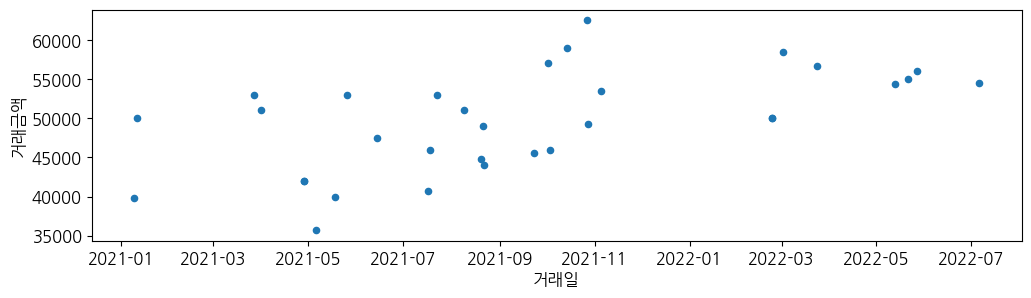

In [58]:
x_30_firstpark.plot('거래일','거래금액', kind='scatter')

In [59]:
df['년'] = df['거래일'].dt.year 
df['월'] = df['거래일'].dt.month 

In [60]:
df.groupby(['년', '월'], as_index=True).mean()

전용면적          거래금액        평형대
년    월                                     
2021 1   76.331313  39337.191011  18.000000
     2   78.747755  41969.486301  18.595890
     3   76.215254  40824.516340  17.679739
     4   75.614999  39908.488372  17.703488
     5   74.673143  43063.529412  17.647059
     6   83.853958  48090.178138  20.121457
     7   84.389193  50153.676529  20.138067
     8   79.639307  48893.098291  19.017094
     9   82.931137  52787.111717  20.054496
     10  78.952492  49510.450161  18.874598
     11  78.664707  49979.393939  18.909091
     12  83.226859  50705.555556  20.148148
2022 1   78.441738  49690.776699  18.446602
     2   81.373681  51848.800000  19.760000
     3   72.589564  49566.048689  17.265918
     4   78.903047  52901.955720  18.929889
     5   80.287553  51186.554622  19.411765
     6   82.356623  56261.549296  20.563380
     7   79.748994  49366.666667  18.777778
     8   87.413965  47827.575758  21.666667
     9   84.409394  47264.323529  20.588235

# 여러개의 함수를 적용하여 GroupBy 집계
 - grouped.agg()

https://rfriend.tistory.com/392

# 연습문제(Exercise) 2 - Just Do It Now !

In [61]:
# 법정동, 년, 월 3개 값을 기준으로 groupby 하고, [거래량, 평균, 최고가, 최저가]를 뽑아보세요
# 1. df.groupby()
grouped = df.groupby(['법정동', '년', '월'])

# 2. 원하는 통계뽑기  HINT :  ['size' : 거래량, 'mean' : 평균, 'max' : 최대값, 'min' : 최소값]
function_list = ['size', 'mean', 'max', 'min']

# groupby_result.apply(pd.to_numeric)
# 3  grouped object.agg(function list)
groupby_result = grouped['거래금액'].agg(function_list)

# 4. 필요groupby_result시 데이터 타입으로 변경
groupby_result['mean'] = groupby_result['mean'].astype(int)

# 5. loc를 이용해서 특정동만 인덱싱하여 출력
groupby_result.loc['가좌동']

size   mean    max    min
년    월                            
2021 1     27  38244  55000  29700
     2     22  41638  70700  26750
     3     14  39864  70000  26700
     4     19  40594  70200  26900
     5     21  40414  72000  28700
     6     15  39020  52000  28000
     7     28  41821  75000  31000
     8     44  41868  80000  33000
     9     23  41932  59850  29200
     10    33  46360  75000  32000
     11    12  44233  75000  30700
     12    10  45005  67000  27500
2022 1      7  52800  85000  36000
     2      8  47187  67800  30700
     3     10  51200  75000  38500
     4      9  42133  56000  34000
     5     17  49917  82500  38700
     6      2  43300  44900  41700
     7      6  43383  54500  30500
     8      1  40500  40500  40500
     9      1  42500  42500  42500

In [62]:
# 20 평대 거래건수만 필터링 합니다.

In [63]:
x_20 = df.loc[df['평형대']==20]
x_20

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,거래일,평형대
2,41287,고양대로,일산동,955-2,일산동양(955-2),2004,7,84.9720,2021,1,...,41287,10100,1,41287-158,,,,,2021-01-02,20.0
4,41287,산현로,일산동,1694,동문,1996,16,84.9600,2021,1,...,41287,10100,1,41287-79,,,,,2021-01-02,20.0
5,41287,고양대로,일산동,954,태영(954),2002,14,84.8900,2021,1,...,41287,10100,1,41287-36,,,,,2021-01-02,20.0
8,41287,킨텍스로,일산동,1055,후곡마을(동성),1994,19,69.3900,2021,1,...,41287,10100,1,41287-16,,,,,2021-01-04,20.0
10,41287,후곡로,일산동,1046,후곡마을(동양),1995,7,71.0800,2021,1,...,41287,10100,1,41287-19,,,,,2021-01-05,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5687,41287,원일로21번길,일산동,1655,일신휴먼빌(1655),2003,19,70.9830,2022,9,...,41287,10100,1,41287-140,중개거래,경기 고양일산서구,,,2022-09-15,20.0
5697,41287,중앙로,주엽동,17,문촌마을(동부),1996,11,73.7180,2022,9,...,41287,10200,1,41287-65,중개거래,경기 고양일산서구,,,2022-09-13,20.0
5700,41287,주엽로,주엽동,12,문촌마을(동아)8단지,1994,12,71.6400,2022,9,...,41287,10200,1,41287-66,직거래,,,,2022-09-26,20.0
5708,41287,하이파크로,덕이동,1524,하이파크시티일산아이파크1단지,2011,7,84.9898,2022,9,...,41287,10500,1,41287-295,직거래,,,,2022-09-02,20.0


In [64]:
x_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2361 entries, 2 to 5712
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지역코드        2361 non-null   object        
 1   도로명         2361 non-null   object        
 2   법정동         2361 non-null   object        
 3   지번          2361 non-null   object        
 4   아파트         2361 non-null   object        
 5   건축년도        2361 non-null   object        
 6   층           2361 non-null   object        
 7   전용면적        2361 non-null   float64       
 8   년           2361 non-null   int64         
 9   월           2361 non-null   int64         
 10  일           2361 non-null   object        
 11  거래금액        2361 non-null   int64         
 12  도로명건물본번호코드  2361 non-null   object        
 13  도로명건물부번호코드  2361 non-null   object        
 14  도로명시군구코드    2361 non-null   object        
 15  도로명일련번호코드   2361 non-null   object        
 16  도로명지상지하코드   2361 non-nul

In [65]:
grouped = x_20.groupby(['법정동', '년', '월'])
function_list = ['size', 'mean', 'max', 'min']
groupby_result = grouped['거래금액'].agg(function_list) 

In [66]:
groupby_result

size          mean    max    min
법정동 년    월                                  
가좌동 2021 1    19  36010.526316  41800  30000
         2    15  36473.333333  41500  29700
         3     8  37318.750000  41000  33000
         4    12  38516.666667  44500  31000
         5    12  36950.000000  42200  30000
...          ...           ...    ...    ...
탄현동 2022 4    26  44908.846154  74000  31500
         5    23  42482.608696  71000  32000
         6    20  39095.000000  57500  30500
         7     6  42050.000000  50000  35500
         8     8  39262.500000  50000  30000

[122 rows x 4 columns]

In [67]:
# groupby_result.apply(pd.to_numeric)
groupby_result['mean'] = groupby_result['mean'].astype(int)
groupby_result.loc['가좌동']

size   mean    max    min
년    월                            
2021 1     19  36010  41800  30000
     2     15  36473  41500  29700
     3      8  37318  41000  33000
     4     12  38516  44500  31000
     5     12  36950  42200  30000
     6     11  38654  42500  32500
     7     14  38392  42800  32800
     8     28  40400  43000  33000
     9     18  40566  43800  37000
     10    19  42063  45000  37200
     11     7  41414  47000  37800
     12     8  40068  50000  27500
2022 1      4  42825  44000  40500
     2      4  44750  45000  44000
     3      3  41666  43500  38500
     4      6  41166  46000  34300
     5      8  43725  45700  40000
     6      2  43300  44900  41700
     7      3  45766  47900  43000
     8      1  40500  40500  40500

In [68]:
grouped_1 = x_20.groupby(['법정동', '거래일'])
function_list = ['size', 'mean', 'max', 'min']
groupby_result_1 = grouped_1['거래금액'].agg(function_list)

groupby_result_1['mean'] = groupby_result_1['mean'].astype(int)
dong = groupby_result_1.loc['가좌동']
dong

,size,mean,max,min
거래일,,,,
2021-01-02,3,36166,36500,36000
2021-01-04,1,34900,34900,34900
2021-01-06,1,32000,32000,32000
2021-01-08,1,35000,35000,35000
2021-01-09,2,37400,38800,36000
...,...,...,...,...
2022-06-28,1,44900,44900,44900
2022-07-02,1,46400,46400,46400
2022-07-06,1,47900,47900,47900


In [69]:
year_summary = df.groupby(['년'])['거래금액'].agg(['sum','mean', 'count'])
year_summary

,sum,mean,count
년,,,
2021,201336424,45988.219278,4378
2022,68547962,51308.354790,1336


<AxesSubplot:xlabel='법정동'>

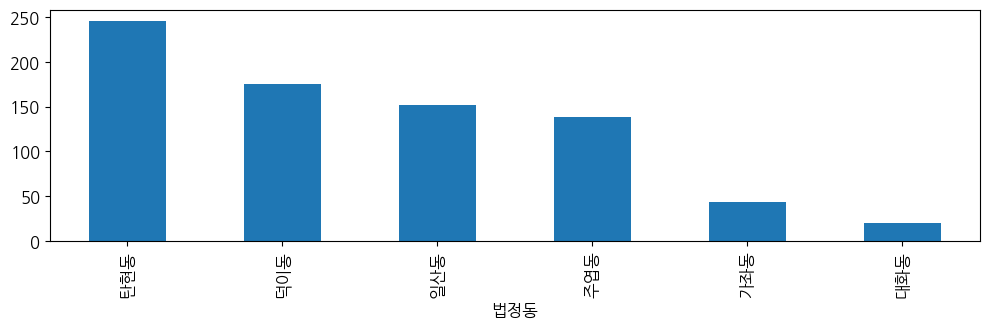

In [70]:
x_30.value_counts('법정동').plot(kind='bar')

<AxesSubplot:xlabel='평형대'>

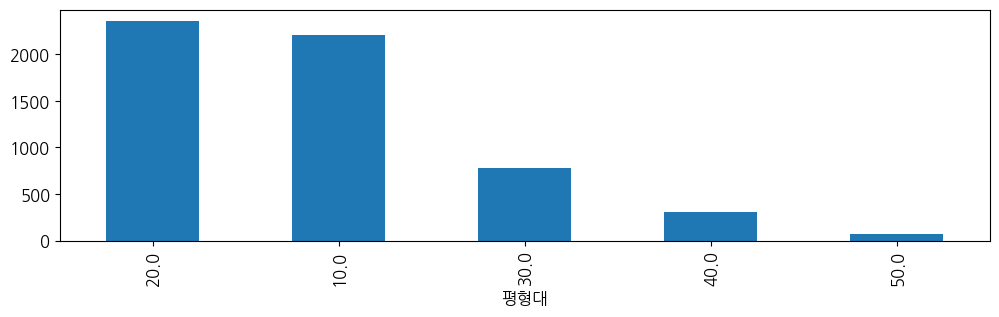

In [71]:
df.value_counts('평형대').plot(kind='bar')

# 5일, 10일, 30일 이동평균선 구하기

In [72]:
import warnings
warnings.filterwarnings("ignore")

# dong['MA3'] = dong['mean'].rolling(3).mean()
dong['MA5'] = dong['mean'].rolling(5).mean()
dong['MA10'] = dong['mean'].rolling(10).mean()
dong['MA30'] = dong['mean'].rolling(30).mean()
dong

,size,mean,max,min,MA5,MA10,MA30
거래일,,,,,,,
2021-01-02,3,36166,36500,36000,NaN,NaN,NaN
2021-01-04,1,34900,34900,34900,NaN,NaN,NaN
2021-01-06,1,32000,32000,32000,NaN,NaN,NaN
2021-01-08,1,35000,35000,35000,NaN,NaN,NaN
2021-01-09,2,37400,38800,36000,35093.2,NaN,NaN
...,...,...,...,...,...,...,...
2022-06-28,1,44900,44900,44900,44430.0,42640.0,42048.333333
2022-07-02,1,46400,46400,46400,44570.0,43850.0,42678.333333
2022-07-06,1,47900,47900,47900,45150.0,44300.0,43008.333333


# 본인이 살고있는 지역구, 해당동 거래금액 및 거래량 그래프 시각화

In [73]:
# !pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [74]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# !pip install --upgrade mplfinance

In [75]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
# from mplfinance.original_flavor import candlestick_ohlc
# from pandas_datareader import data  
# from datetime import datetime
# import pandas as pd
# import numpy as np

[그래프 구역 나누기 참고 블로그](https://yeko90.tistory.com/entry/matplotlib-%EA%B8%B0%EC%B4%88-subplot2grid%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EC%BB%A4%EC%8A%A4%ED%84%B0%EB%A7%88%EC%9D%B4%EC%A7%95)

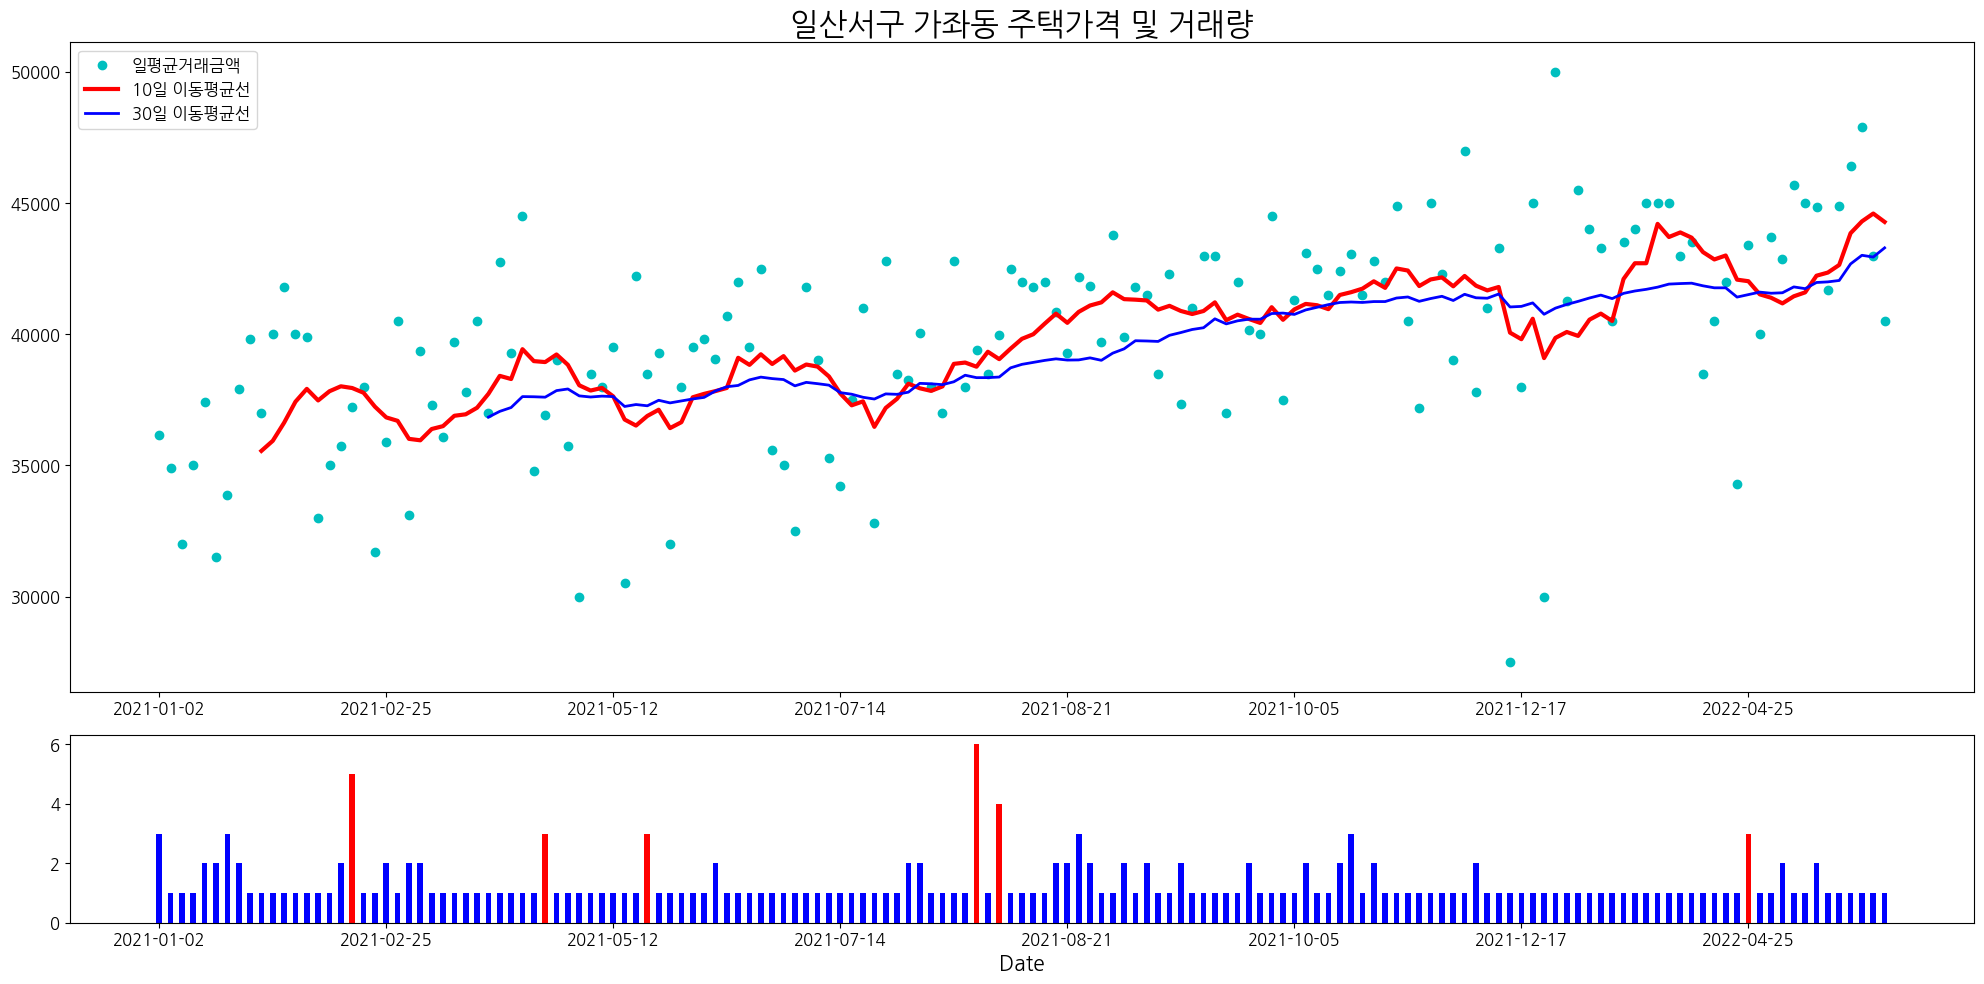

In [77]:
#----------------------------------------------------------------------------------#
# 그래프 구역 나누기 #참고 블로그 공부하시면 좋아요
fig = plt.figure(figsize=(20,10))
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4) # 첫번째 인자값 (4,4)는 전체 shape, 두번째 인자값은 top axes의 위치 첫행(0), 첫열(0), 사이즈는 세로3x4가로
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4, sharex=top_axes) #두번째 인자값 3,0 에서 3은 네번째 행, 0은 첫번째열, 세로 1 x 가로 4
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)
#----------------------------------------------------------------------------------#

# 인덱스 설정
idx = dong.index.astype('str')

# 일 평균 거래금액
top_axes.plot(idx, dong['mean'], 'co', label='일평균거래금액', linewidth=0.7)

# 거래금액 이동평균선 그리기
top_axes.plot(idx, dong['MA10'],'r-', label='10일 이동평균선', linewidth=3.0)
top_axes.plot(idx, dong['MA30'],'b-', label='30일 이동평균선', linewidth=2.0)

# # 캔들차트 그리기
# candlestick_ohlc(top_axes, dong['mean'], dong['max'], 
#                   dong['min'], dong['mean'],
#                   width=0.5, colorup='r', colordown='b') # 해당월초 거래금액, 해당월말 거래금액 산출후. mean 대신 대입


#----------------------------------------------------------------------------------#

# 거래량 날짜 지정. 평균 거래량(건수) 보다 큰 날은 빨강, 작은 날은 파랑
color_fuc = lambda x : 'r' if x >dong['size'].mean() else 'b'
# color_fuc = lambda x : 'r' if x >= 0 else 'b'
color_list = list(dong['size'].diff().fillna(0).apply(color_fuc))

bottom_axes.bar(idx, dong['size'], width=0.5, 
                align='center',
                color=color_list)
#----------------------------------------------------------------------------------#

# 그래프 title 지정
top_axes.set_title('일산서구 가좌동 주택가격 및 거래량', fontsize=22)

# X축 티커 숫자 10개로 제한 (22개월->22개)
top_axes.xaxis.set_major_locator(ticker.MaxNLocator(10))

# X축 라벨 지정
bottom_axes.set_xlabel('Date', fontsize=15)

top_axes.legend()
plt.tight_layout()
plt.show()

### 정리 잘 되어있는 블로그, 깃허브 추천
 - [실거래가 데이터 핸들링 기초](https://baem1n.dev/2021/01/31/DATA-APT-05/#%EA%B5%AC%EB%B3%84-%ED%95%A9%EA%B3%84-%EA%B1%B0%EB%9E%98-%EA%B8%88%EC%95%A1-%EA%B3%84%EC%82%B0)
 - [파이썬으로 배우는 알고리즘 트레이딩](https://wikidocs.net/4765)
 - [청년 데이터 프로젝트](https://github.com/ek-koh/zipdoc_project/blob/master/pre_processing/%EC%9D%B8%EA%B5%AC%EC%A3%BC%ED%83%9D%EC%B4%9D%EC%A1%B0%EC%82%AC_%EA%B0%80%EA%B5%AC%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb)
 - [플롯 틱수 설정방법](https://www.delftstack.com/ko/howto/matplotlib/set-number-of-plot-ticks/)